# scikit-learnについて

## 前処理

### 欠損値

In [1]:
# 欠損値への対応
import numpy as np
import pandas as pd
df = pd.DataFrame(
    {
        "A": [1, np.nan, 3, 4, 5],
        "B": [6, 7, 8, np.nan, 10],
        "C": [11, 12, 13, 14, 15]
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [2]:
# 欠損値の確認
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [12]:
# 列の平均値で欠損値を埋める
from sklearn.impute import SimpleImputer
imp = SimpleImputer(np.nan, "mean")
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

### エンコーディング

In [23]:
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": ["a", "b", "a", "b", "c"]
    }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [24]:
# カテゴリ変数のエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["B"])
le.transform(df["B"])  # これだけだと元の配列は変わらない

array([0, 1, 0, 1, 2])

In [25]:
# 元の値を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [50]:
# One-hot エンコーディング
# このエンコーディングはダミー変数化と同じ
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df_ohe = df.copy()
ct = ColumnTransformer([("test", OneHotEncoder(), ["B"])], remainder="drop")
ct.fit_transform(df_ohe)

# 以下のコードはエラーになった
# df_ohe["B"] = le.transform(df_ohe["B"])
# df_ohe["B"] = le.fit_transform(df_ohe["B"])
# df_ohe["B"]
# ohe = OneHotEncoder()
# ohe.fit_transform(df_ohe).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 特徴量の正規化
  
★sklearnを用いた基本的な前処理の手順は以下の通り。  
①行う前処理のクラスをインポート  
②インスタンス化  
③fit()でデータを入れる  
④transform()でデータを変換する。
  
  
分散正規化  
>平均が0、標準偏差が1となるように特徴量を変換する処理。  
標準化、z変換と同義
  
最小最大正規化  
>最小値が0、最大値が1となるように特徴量を正規化する処理。  
x' = (x - x_min) / (x_max - x_min)

In [51]:
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 400, 500, 800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [68]:
print("平均:{:.2f}".format(df["B"].mean()))
print("標準偏差：{:.2f}".format(np.std(df["B"])))

平均:400.00
標準偏差：244.95


In [71]:
# 分散正規化実行
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [73]:
# 最大最小正規化実行
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

## 分類
  
・データのクラスを予測して分けるタスク

### 分類モデル構築の流れ
1.学習データ、テストデータに分ける。  
2.学習データをもとにモデルを構築。  
3.テストデータから結果を予測、評価を行う。  
4.精度改善

In [78]:
# データの用意
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print("X:")
print(X[:5])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [80]:
# 学習データ、テストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### サポートベクタマシン
  
・分類、回帰だけでなく、外れ値検出にも使えるアルゴリズム。  
・直線や平面などで分類できない（線形分類できない）データを高次元の空間に移して線形分離をすることにより、分類を行うアルゴリズム

X0: (100, 2)
y0: (100,)


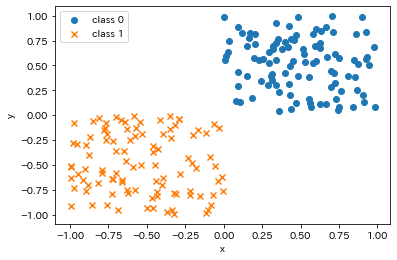

In [87]:
import matplotlib.pyplot as plt
np.random.seed(123)
# 0~1の一様分布を100個サンプリング
X0 = np.random.uniform(size=(100, 2))
print("X0:", X0.shape)
y0 = np.repeat(0, 100)
print("y0:", y0.shape)
# -1~0の一様分布を100個サンプリング
X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
y1 = np.repeat(1, 100)
fix, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker="o", label="class 0")
ax.scatter(X1[:, 0], X1[:, 1], marker="x", label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [121]:
print(y0.shape, X0.shape)
print((np.vstack((X0, X1))).shape)
print((np.hstack((y0, y1))).shape)
# np.linspace(-1, 1, 100)

(100,) (100, 2)
(200, 2)
(200,)


In [114]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    # Xは行列、yは配列となっているため、結合方法が異なる。
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker="o", label="class 0")
    ax.scatter(X1[:, 0], X1[:, 1], marker="x", label="class 1")
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, color="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, -1], s=250, facecolors="none", edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

<ipython-input-114-a139ed52c926>:15: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(xx, yy, p, color="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])


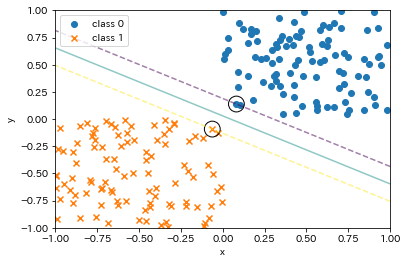

In [115]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=1e6)

<ipython-input-114-a139ed52c926>:15: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(xx, yy, p, color="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])


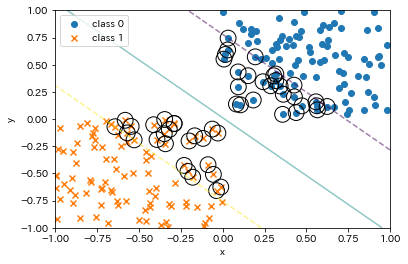

In [124]:
# マージンを大きくした場合
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=0.1)